In [1]:
# Importação das Bibliotecas 
import pandas as pd
import seaborn as sns
import random
import collections
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Importação dos dados a serem utilizados para a criação do modelo de ML
# skiprows = 0.01 = 1% of the lines
#nrows= 15_000_000)
data_origin = pd.read_csv(r'D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Database_training_reduce_7_01.csv', 
                          encoding='latin-1'#,skiprows=lambda i: i>0 and random.random() > 0.50
                         )

# ADICIONANDO CABEÇALHO AO ARQUIVO
data_origin.columns=['patients', 'neuro_1', 'cardi_1', 'respi_1', 'coagu_1', 'hepat_1', 'renal_1', 'SPICT_1', 'ECOG_1', 'SOFA_total_1', 'amib_total_1',
                          'neuro_2', 'cardi_2', 'respi_2', 'coagu_2', 'hepat_2', 'renal_2', 'SPICT_2', 'ECOG_2', 'SOFA_total_2', 'amib_total_2','decisao'
                    ]
#Removendo a coluna patients
data = data_origin.drop('patients', axis=1)

#TRANSFORMANDO O DATASET PARA MELHOR TRABALHAR
data = data.astype('int8')

data

#Se tiver um bom resultado, pode ser exportado essa base de dados.
#data_origin.to_csv("D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Dataset_Trained_26-02.csv")

,neuro_1,cardi_1,respi_1,coagu_1,hepat_1,renal_1,SPICT_1,ECOG_1,SOFA_total_1,amib_total_1,...,cardi_2,respi_2,coagu_2,hepat_2,renal_2,SPICT_2,ECOG_2,SOFA_total_2,amib_total_2,decisao
0,1,3,1,1,0,2,3,1,6,4,...,2,1,4,1,1,3,4,8,4,2
1,1,3,1,1,0,2,3,1,6,4,...,4,0,3,3,0,3,2,10,5,1
2,1,3,1,1,0,2,3,1,6,4,...,2,1,3,1,0,0,3,7,1,1
3,1,3,1,1,0,2,3,1,6,4,...,4,4,2,0,3,0,4,14,3,1
4,1,3,1,1,0,2,3,1,6,4,...,4,3,4,0,4,0,4,14,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24269177,0,0,0,3,3,1,0,1,6,1,...,2,3,2,2,0,0,1,12,3,2
24269178,0,0,0,3,3,1,0,1,6,1,...,3,1,3,1,0,0,0,8,1,2
24269179,0,0,0,3,3,1,0,1,6,1,...,0,2,2,4,2,0,3,10,2,2
24269180,0,0,0,3,3,1,0,1,6,1,...,0,0,3,1,2,3,4,5,4,2


Tamanho do conjunto de dados =  24269182
Contagem de ocorrências de cada valor da coluna:
 2    12312827
1    11955089
0        1266
Name: decisao, dtype: int64


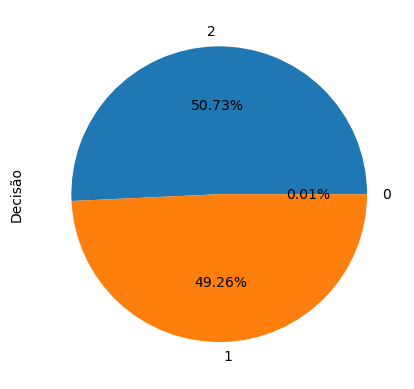

In [3]:
# Quantidade de registros no dataset com cada decisão do AMIB/ABRAMED
print("Tamanho do conjunto de dados = ", len(data.index))

print("Contagem de ocorrências de cada valor da coluna:\n", data['decisao'].value_counts())

# GRAFICO PARA MOSTRAR A DIVISÃO DOS REGISTROS.
%matplotlib inline
import matplotlib.pyplot as plt

data['decisao'].value_counts().plot(kind='pie', autopct='%0.2f%%', label = 'Decisão');
plt.savefig('tres_divisao_dados.png', format='png')

<AxesSubplot:>

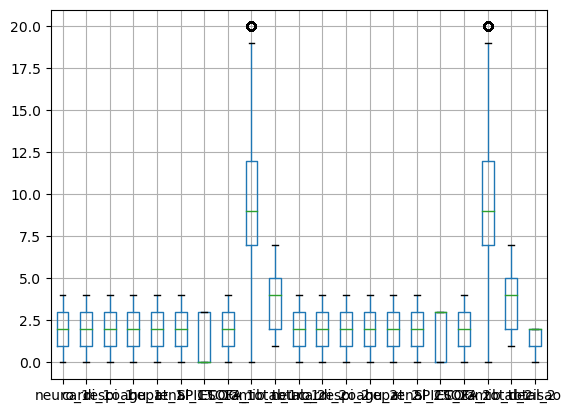

In [4]:
data.boxplot()

<Figure size 1920x1440 with 0 Axes>

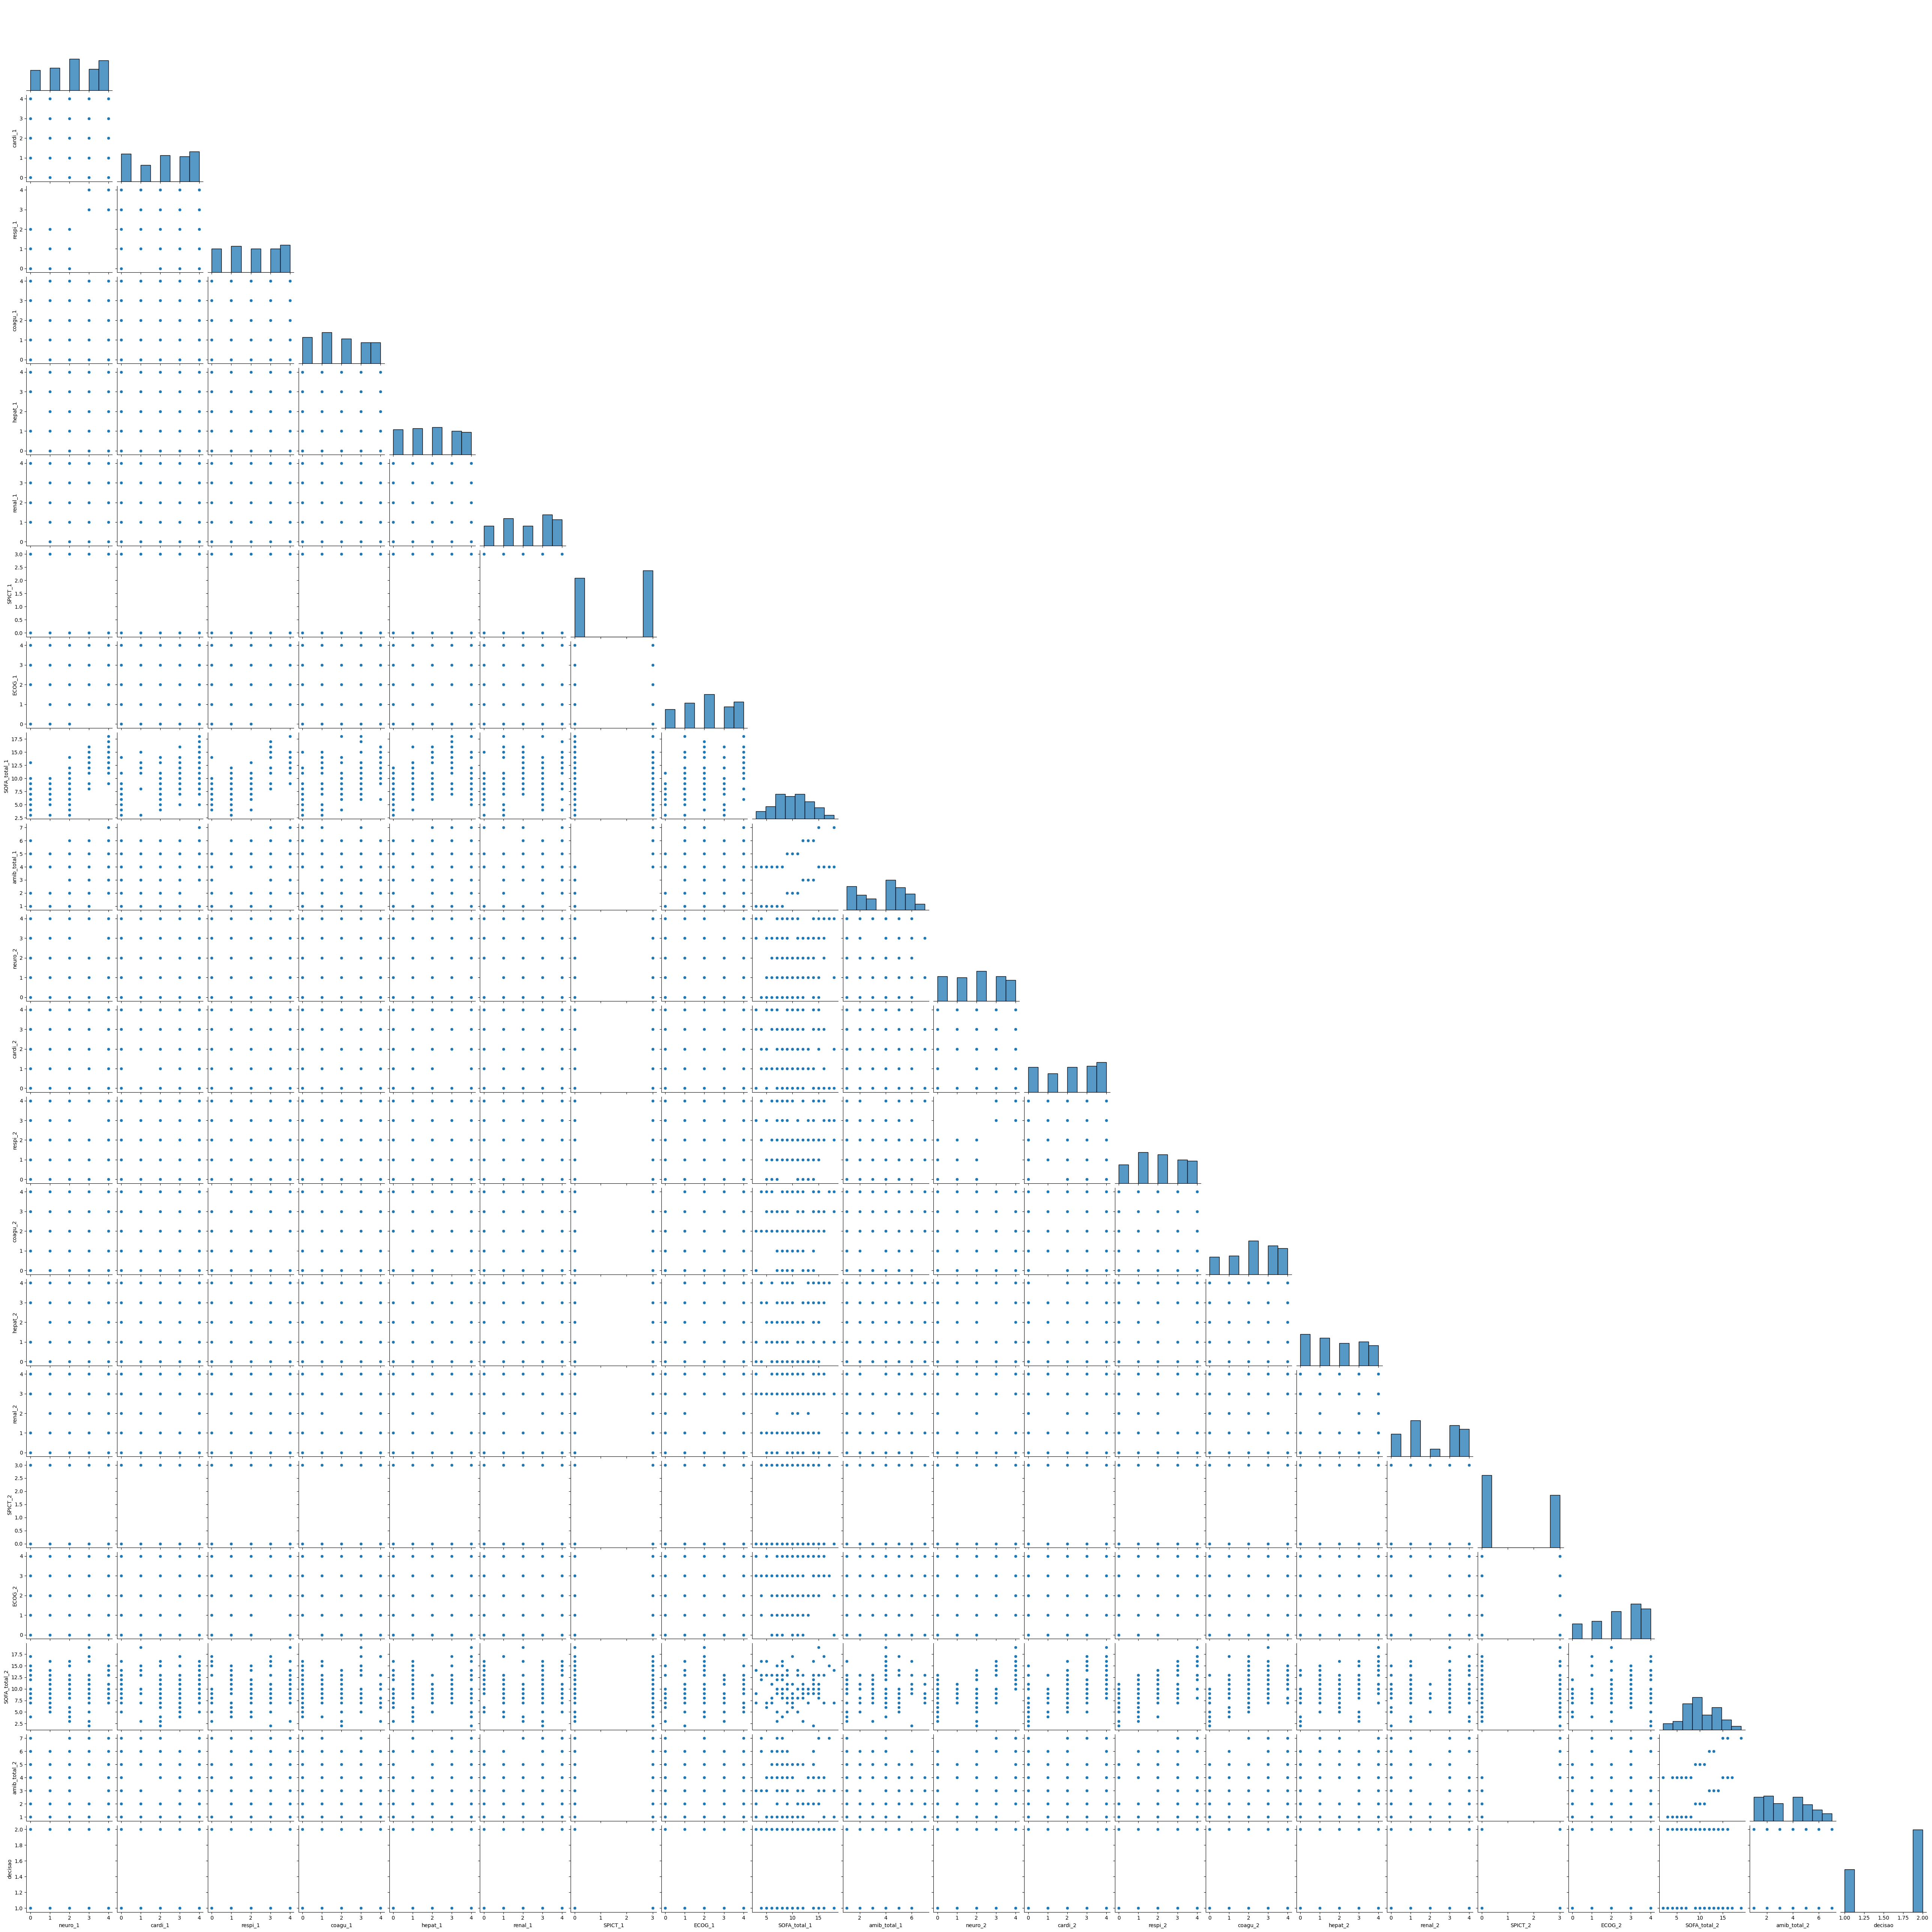

In [5]:
#Mostra informações gerais dos dados
plt.figure(dpi=300)
sns.pairplot(data.sample(n=100), corner=True)

In [6]:
# Visualiza a Correlação
#correlation_matrix = data.corr()
# Plotar o mapa de calor
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.savefig('tres_Correlacao.png')

In [7]:
# Selecionando as variáveis a serem utilizadas na Previsão e colocando em 'X'
# somente removendo as que não fazem parte do grupo
X = data.drop("decisao", axis=1)
# Colocando a variável target (label, variavel a ser predita....) no objeto 'Y'
Y = data['decisao'].values.tolist()

In [8]:
# Dividindo os dados em Treino e Teste (30% para teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print('O dataset de treino possui {} registros e o de teste {} registros.'
       .format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 16988427 registros e o de teste 7280755 registros.


In [9]:
# Criando a Máquina Preditiva - Instanciando o Algoritmo de ML (Chamando o algoritmo a ser usado)
clf_RF = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
# Treinando o Algoritmo com os dados de treino
clf_RF = clf_RF.fit(X_train, Y_train)

In [11]:
pd.to_pickle(clf_RF, r'D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Model_MDS_4-03.pickle')

In [12]:
#Modelo = pd.read_pickle(r'D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Model_MDS.pickle')

In [13]:
# Importância das Variáveis
#features = data.columns.difference(['decisao'])
features = data
features_importance = zip(clf_RF.feature_importances_, data)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

SOFA_total_2: 30.351345%
SOFA_total_1: 30.106075%
amib_total_2: 7.938170%
amib_total_1: 7.390826%
SPICT_2: 3.798267%
SPICT_1: 3.426270%
neuro_2: 1.540481%
respi_2: 1.517383%
respi_1: 1.481918%
neuro_1: 1.457680%
cardi_2: 1.456978%
hepat_2: 1.430705%
hepat_1: 1.376831%
coagu_1: 1.343955%
cardi_1: 1.329228%
coagu_2: 1.271906%
renal_1: 0.731706%
renal_2: 0.690316%
ECOG_1: 0.685434%
ECOG_2: 0.674527%


In [14]:
# 5° Avaliando a Acurácia do Modelo de Machine Learning

# Validando a Maquina Preditiva - Verificando o nível de Acurácia da Máquina Preditiva
accuracy = clf_RF.score(X_test, Y_test)
print('Accuracy: ' + str(accuracy))


Accuracy: 0.9999979397741031


In [15]:
# CRIANDO AS MÉTRICAS COM A SELEÇÃO DE DADOS QUE O RANDOM FOREST SEPAROU.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = clf_RF.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
auc_roc = roc_auc_score(Y_test, clf_RF.predict_proba(X_test), multi_class='ovr')
cm = confusion_matrix(Y_test, y_pred)

print(f'Acurácia-RF: {accuracy:.2f}')
print(f'Precisão-RF: {precision:.2f}')
print(f'Recall-RF: {recall:.2f}')
print(f'F1-Score-RF: {f1:.2f}')
print(f'AUC-ROC-RF: {auc_roc:.2f}')
print(f'Matriz de Confusão-RF:\n{cm}')

Acurácia-RF: 1.00
Precisão-RF: 1.00
Recall-RF: 1.00
F1-Score-RF: 1.00
AUC-ROC-RF: 1.00
Matriz de Confusão-RF:
[[    381       4       0]
 [      0 3586576       5]
 [      0       6 3693783]]


In [2]:
## Importação de outro arquivo.
Data_validation = pd.read_csv(r'D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Database_training_reduce_7_23.csv',
                              encoding='latin-1' , skiprows=lambda i: i>0 and random.random() > 0.50 # 50%
                             )

# ADICIONANDO CABEÇALHO AO ARQUIVO
Data_validation.columns=['patients', 'neuro_1', 'cardi_1', 'respi_1', 'coagu_1', 'hepat_1', 'renal_1', 'SPICT_1', 'ECOG_1', 'SOFA_total_1', 'amib_total_1',
                          'neuro_2', 'cardi_2', 'respi_2', 'coagu_2', 'hepat_2', 'renal_2', 'SPICT_2', 'ECOG_2', 'SOFA_total_2', 'amib_total_2','decisao'
                        ]
# Colocando a variável target em 'Y' para comparação
Y_validation = Data_validation['decisao'].values.tolist()

#Removendo a coluna patients e decisao
Data_prepared = Data_validation.drop(['patients','decisao'], axis=1)


In [5]:
clf_RF = pd.read_pickle(r'D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Model_MDS_4-03.pickle')

In [6]:
New_Predictions = clf_RF.predict(Data_prepared)

count = 0
diff = []

for i in range(len(Y_validation)):
    if Y_validation[i] != New_Predictions[i]:
        count += 1
        diff.append((i, Y_validation[i], New_Predictions[i]))
#       err_grave = Data_prepared[i]
        
#print(err_grave)
print("Número de elementos diferentes: ", count)
print("Porcentagem de diferença: ", (count/len(Y_validation))*100, "%")

c = collections.Counter((d[1], d[2]) for d in diff)
                                                                                                                                                                                                                                                                   
print('porcentagem erro grave', sum((c[(2,1)], c[(1,2)]))/len(Y_validation)*100, '%')
print('porcentagem decisão', sum((c[0, 1], c[0,2]))/len(Y_validation)*100, '%')

print(c)


Número de elementos diferentes:  520568
Porcentagem de diferença:  4.164451715749979 %
porcentagem erro grave 0.1153974427926677 %
porcentagem decisão 4.049054272957312 %
Counter({(0, 1): 278406, (0, 2): 227737, (2, 1): 7374, (1, 2): 7051})


In [7]:
result_data = []

for i in range(100): # ou range(len(diff))
    result_data.append(list(Data_prepared.iloc[diff[i][0]]) + [diff[i][1]] + [diff[i][2]])
    
result_data = set(map(tuple, result_data)) # converter em conjunto, remover duplicatas, e converter de volta para lista

result_df = pd.DataFrame(result_data, columns=list(Data_prepared.columns) + ['previsão_arquivo'] + ['previsão_IA'])

# Exportar para CSV
result_df.to_csv('Exportação.csv')

print(result_df)


    neuro_1  cardi_1  respi_1  coagu_1  hepat_1  renal_1  SPICT_1  ECOG_1  \
0         1        3        1        2        4        3        0       4   
1         1        3        1        2        4        3        0       4   
2         1        3        1        2        4        3        0       4   
3         1        3        1        2        4        3        0       4   
4         1        3        1        2        4        3        0       4   
..      ...      ...      ...      ...      ...      ...      ...     ...   
95        1        3        1        2        4        3        0       4   
96        1        3        1        2        4        3        0       4   
97        1        3        1        2        4        3        0       4   
98        1        3        1        2        4        3        0       4   
99        1        3        1        2        4        3        0       4   

    SOFA_total_1  amib_total_1  ...  respi_2  coagu_2  hepat_2  renal_2  \


Tamanho do conjunto de dados =  12500277
Contagem de ocorrências de cada valor da coluna:
 1    6028915
2    5965035
0     506327
Name: decisao, dtype: int64


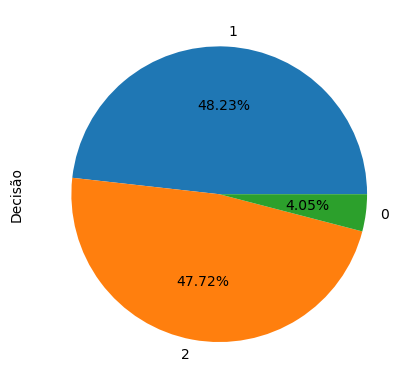

In [8]:
# Quantidade de registros no dataset com cada decisão do AMIB/ABRAMED
print("Tamanho do conjunto de dados = ", len(Data_validation.index))

print("Contagem de ocorrências de cada valor da coluna:\n", Data_validation['decisao'].value_counts())

# GRAFICO PARA MOSTRAR A DIVISÃO DOS REGISTROS.
%matplotlib inline
import matplotlib.pyplot as plt

Data_validation['decisao'].value_counts().plot(kind='pie', autopct='%0.2f%%', label = 'Decisão');
plt.savefig('segundo_teste.png', format='png')

In [9]:
# IMPORTTANCIA DAS VARIAVEIS PARA O DATASET DE CIMA
features = Data_validation
features_importance = zip(clf_RF.feature_importances_, Data_validation)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

ECOG_2: 30.351345%
ECOG_1: 30.106075%
SOFA_total_2: 7.938170%
SOFA_total_1: 7.390826%
renal_2: 3.798267%
renal_1: 3.426270%
amib_total_1: 1.540481%
cardi_2: 1.517383%
cardi_1: 1.481918%
patients: 1.457680%
neuro_2: 1.456978%
coagu_2: 1.430705%
coagu_1: 1.376831%
respi_1: 1.343955%
neuro_1: 1.329228%
respi_2: 1.271906%
hepat_1: 0.731706%
hepat_2: 0.690316%
SPICT_1: 0.685434%
SPICT_2: 0.674527%
